# CONFIDENCE INTERVALS \(CI\)

Find an **interval** in which the **true effective size** \(of the population\) **falls a certain percentage of time**.

The **effective size \(measurement\)** can any statistic we are interested in: **median**, **proportion, difference in median**, etc.

The confidence interval needs to **found using similar simulations** done in Lab 2. 

However, the **box model** is different. We need to resample from the **sample**, NOT the population.

Because **practically** speaking we **cannot resample from the population**. It is **more efficient to resample** from the **one sample**.



In [ ]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Example 1 \(from Lab 3\)



In [ ]:
Mobs = 61/110 #observed value

In [ ]:
#SAMPLE FROM GENERAL POP
vacc = 61*["V"]
unvacc = 49*["U"]

boxmodel2 = vacc + unvacc #sample

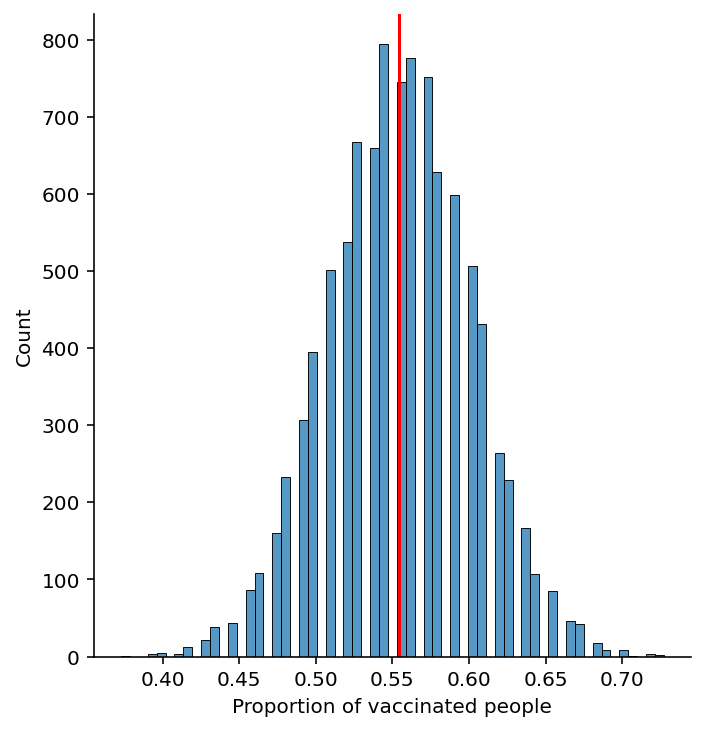

In [ ]:
#HOW WILL THE PROPORTION OF VACCINATED PEOPLE CHANGE IF SIMILAR OUTBREAKS OCCUR?
#SO WE NEED TO RESAMPLE FROM THE SAMPLE
#NOT THE GENERAL POPULATION
simulations = range(10000) #each simulation will represent a different outbreak
sample_size = 110 #some number of people which were vaccinated

prop_list = []
for i in simulations: #for each simulation
    random_resample = np.random.choice( boxmodel2 , sample_size ) #resmaple from the sample
    numV = np.sum( random_resample == "V" )
    propV = numV/sample_size
    prop_list.append( propV )
    
#PLOT DISTRIBUTION
p = sns.displot( data = prop_list )
p.set( xlabel = 'Proportion of vaccinated people' )
plt.axvline( Mobs , color = 'r' )

We are 99% certain the true proportion of vaccinated people will fall in the range [ 0.4363636363636364 - 0.6727272727272728 ]


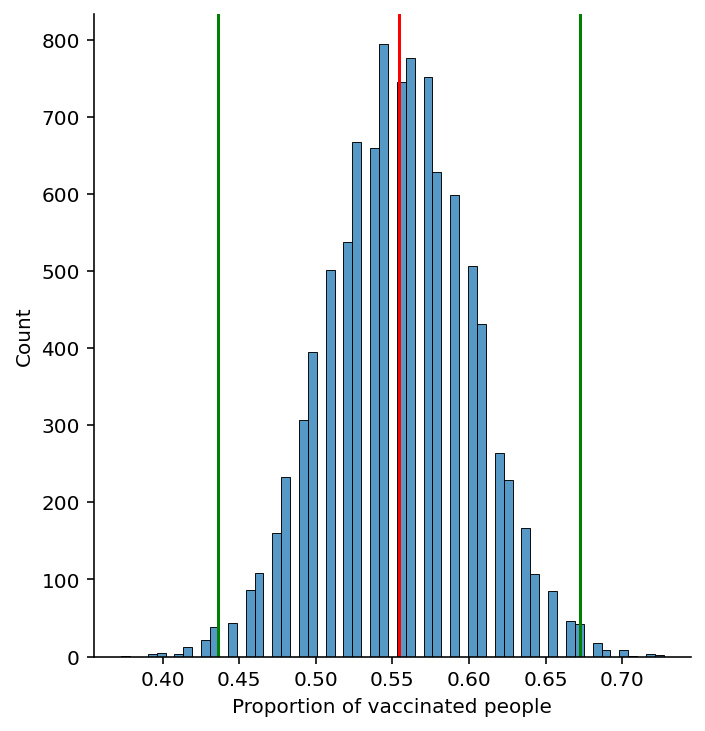

In [ ]:
#FIND CI

#SORT LIST
#YOU USE EITHER THE sorted() OR .sort() FUNCTION
prop_list = sorted( prop_list ) #list which has been sorted

#FIND THE 50TH AND 9950 PERCENTILE
Mlower = prop_list[49]
Mupper = prop_list[9949]

lowerlimit = 2*Mobs - Mupper
upperlimit = 2*Mobs - Mlower

print( 'We are 99% certain the true proportion of vaccinated people will fall in the range [', lowerlimit , '-' , upperlimit, ']'  )

#PLOT DISTRIBUTION
#ALONG WITH CI
p = sns.displot( data = prop_list )
p.set( xlabel = 'Proportion of vaccinated people' )
plt.axvline( Mobs , color = 'r' )
plt.axvline( lowerlimit , color = 'g' )
plt.axvline( upperlimit , color = 'g' )

## Example 2



0.0075
0.0215


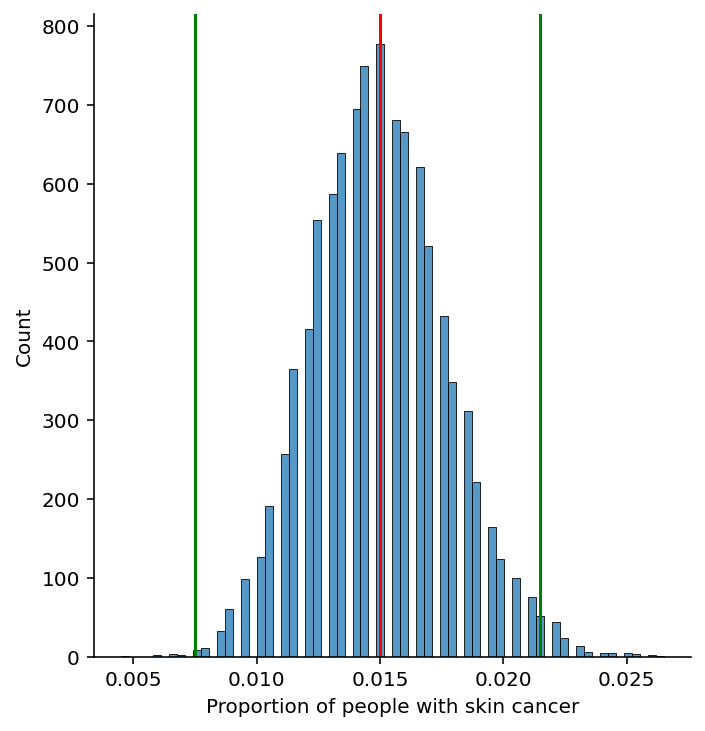

In [ ]:
#SAMPLE FROM USA
#30 CASES OF SKIN CANCER
#TOTAL SAMPLE SIZE OF 2000
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

xobs = 30/2000 #observed value
skin_cancer = 30*["S"] #number of skin cancer cases
non_cancer = 1970*["N"] #number of non skin cancer cases

boxmodel3 = skin_cancer + non_cancer

sample_size = 2000
simulations = 10000

Slist = []
for i in range( simulations ):
    resample = np.random.choice( boxmodel3 , 2000 )
    numS = resample == "S"
    totalS = np.sum(numS)
    propS = totalS/sample_size
    Slist.append( propS )
    
#print(Slist)

#CONFIDENCE INTERVAL
orderedS = sorted(Slist)
xlow = orderedS[49]
xhigh = orderedS[9949]
p2 = sns.displot( data = Slist )
p2.set( xlabel = 'Proportion of people with skin cancer' )
plt.axvline( xobs , color = "r" )
plt.axvline( 2*xobs - xhigh , color = "g" )
plt.axvline( 2*xobs - xlow , color = "g" )
print(2*xobs - xhigh)
print(2*xobs - xlow)

## Example 3 \(from Lab 1\)



In [ ]:
rain = [4.79, 19, 9.65, 8.52, 6.08, 5.85, 8.69, 20.2, 16.36, 9.08, 13.53, 3.21, 13.19, 37.25, 9.24, 16.49, 4.42, 17.94, 11.57, 9.09, 31.01, 12.4, 12.46, 24.35, 8.11, 27.36, 21, 11.47, 7.35, 8.08, 12.48, 7.66, 17.86, 
        12.82, 10.43, 31.25, 10.71, 8.98, 26.98, 19.67, 33.44, 12.31, 7.22, 14.35, 14.92, 21.26, 7.17, 12.32, 7.77, 27.47, 16.58, 22, 20.44, 13.69, 7.93, 8.38, 18.79, 4.85, 8.18, 5.58, 21.13, 9.54, 16, 11.94, 11.99, 
        9.46, 26.21, 8.21]

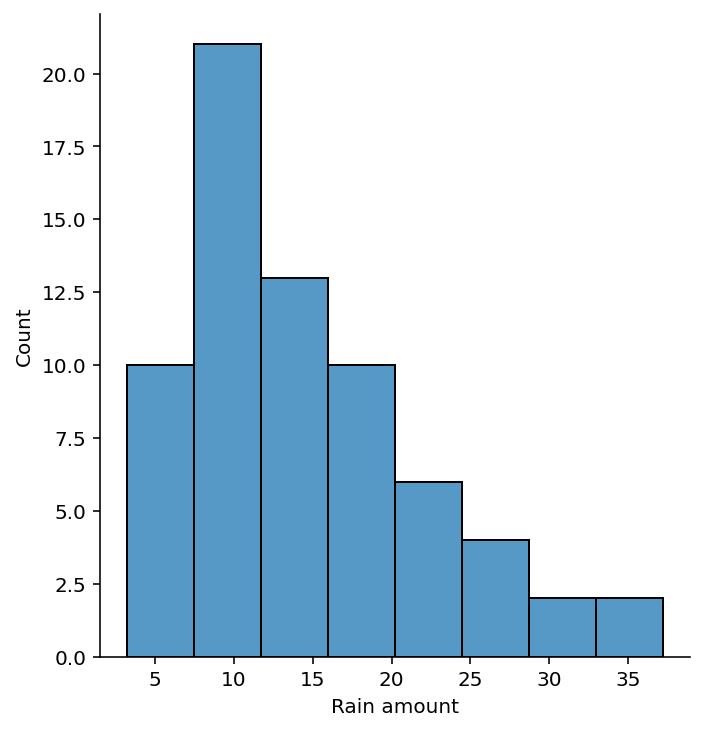

In [ ]:
p = sns.displot( data = rain )
p.set( xlabel = 'Rain amount' )

8.630000000000003
15.280000000000001


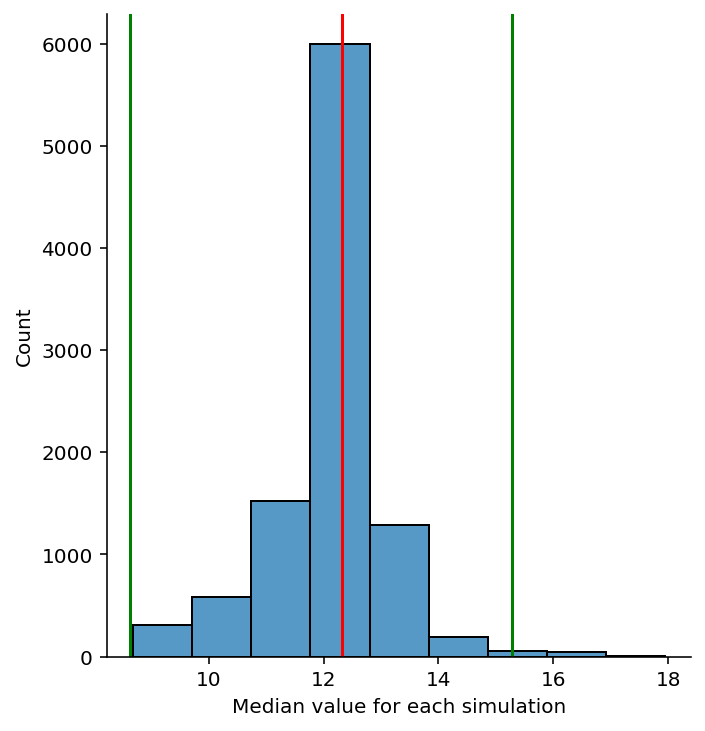

In [ ]:
#FIND A CONFIDENCE INTERVAL FOR THE rain DATASET
#DATA IS CLEARLY NOT UNIFORMLY DISTRIBUTED
#WE WILL USE THE MEDIAN AS THE CENTRAL TENDENCY VALUE
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

xobs = np.median( rain ) #median rain you have observed

boxmodel4 = rain #the sample of rain data

sample_size = len(rain) #same as the sample of rain values
simulations = 10000

med_list = []
for i in range( simulations ):
    resample = np.random.choice( boxmodel4 , sample_size )

    #FIND THE MEDIAN OF THE RESAMPLE
    med_resample = np.median( resample )
    med_list.append( med_resample ) #store median value

#CONFIDENCE INTERVAL
ordered_med = sorted(med_list)
xlow = ordered_med[49]
xhigh = ordered_med[9949]
p4 = sns.displot( data = med_list , bins = 9)
p4.set( xlabel = 'Median value for each simulation' )
plt.axvline( xobs , color = "r" )
plt.axvline( 2*xobs - xhigh , color = "g" )
plt.axvline( 2*xobs - xlow , color = "g" )
print(2*xobs - xhigh)
print(2*xobs - xlow)